## Supervised Machine Learning - Linear Regression Model to predict scores based on the studying hours. 

**In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Data can be found at http://bit.ly/w-data

**What will be predicted score if a student study for 9.25 hrs in a day?

Author : Sindhu Sirigireddy <br>
Date : 08/18/2020

## <font color="green">Importing all the libraries needed for this task</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

## <font color="green">Importing data from a csv file</font>

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


## <font color="green">Checking the datatypes</font>

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

## <font color="green">Pulling the dataset information</font>

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## <font color="green">Checking for missing values</font>

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## <font color="green">Checking the correlation</font>

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


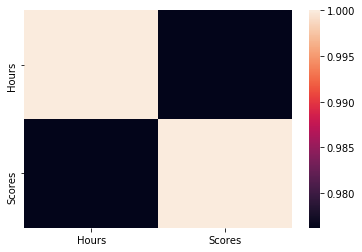

In [8]:
corr=data.corr()
sns.heatmap(corr)

## <font color="green">Plotting the distribution of scores</font>

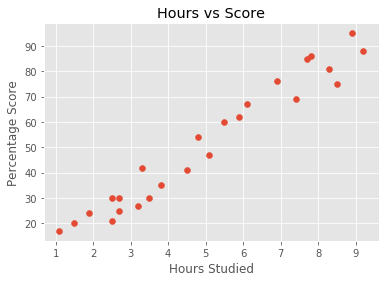

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = data['Hours']
y = data['Scores']
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.scatter(x, y)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## <font color="green">Preparing the Data</font>

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### <font color="green">**Training the Algorithm**</font>
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## <font color="green">Plotting the regression line</font>

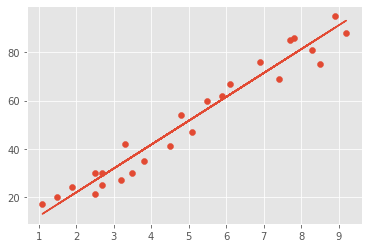

In [13]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### <font color="green">**Making Predictions**</font>

In [14]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
hrs_predict= regressor.predict([[9.25]])
print("If student study 9.25 hrs per day, he could get score", hrs_predict, ".")

If student study 9.25 hrs per day, he could get score [93.69173249] .


In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
